In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.linear_model import LinearRegression

In [2]:
# read in the site coordinates 

path = "/Users/hrd/Documents/data/全国空气质量/_站点列表/站点列表-2017.12.01起.csv"
site = pd.read_csv(path)

In [3]:
# read the site name (a), lon (b) and lat (c)
a = site.iloc[:,2]
b = site.iloc[:,3]
c = site.iloc[:,4]

lon=[]
lat = []

for i in range(len(a)):
    if a[i] == '广州' or a[i] == '深圳' or a[i] == '珠海' or a[i] == '佛山' or a[i] == '中山' or a[i] == '江门' or a[i] == '东莞'or a[i] == '惠州' or a[i] == '肇庆':
        lon.append(b[i])
        lat.append(c[i])


# omit the nan value
lon.pop(2)
lat.pop(2)

nan

In [4]:
len(lon)

56

In [5]:
file_path = "/Users/hrd/Documents/data/全国空气质量/站点_20170101-20171231/filename.log"

with open(file_path, "r") as file:
        content = file.read()
        #print(content)

In [6]:
content[:24]
#content[25:49]

'china_sites_20170101.csv'

In [7]:
# read in the data for 2017
data = []

for i in range(365):
    path = "/Users/hrd/Documents/data/全国空气质量/站点_20170101-20171231/" + content[25*i : 25*i+24]
    data.append(pd.read_csv(path))

In [8]:
data[22]

,date,hour,type,1001A,1002A,1003A,1004A,1005A,1006A,1007A,...,2706A,2707A,2708A,2709A,2710A,2711A,2835A,2842A,2845A,2846A
0,20170123,0,AQI,35.0,50.0,52.0,48.0,49.0,30.0,39.0,...,75.0,NaN,44.0,344.0,375.0,396.0,84.0,52.0,76.0,73.0
1,20170123,0,PM2.5,24.0,35.0,36.0,33.0,34.0,21.0,27.0,...,55.0,NaN,19.0,276.0,325.0,346.0,62.0,30.0,49.0,53.0
2,20170123,0,PM2.5_24h,31.0,16.0,34.0,28.0,29.0,28.0,29.0,...,37.0,NaN,21.0,222.0,282.0,328.0,69.0,36.0,53.0,50.0
3,20170123,0,PM10,NaN,37.0,40.0,37.0,37.0,21.0,NaN,...,77.0,NaN,30.0,455.0,442.0,468.0,96.0,54.0,102.0,65.0
4,20170123,0,PM10_24h,39.0,22.0,49.0,42.0,46.0,40.0,42.0,...,65.0,NaN,24.0,366.0,350.0,461.0,96.0,59.0,99.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,20170123,23,O3_24h,45.0,64.0,51.0,46.0,55.0,72.0,52.0,...,123.0,87.0,80.0,85.0,86.0,47.0,68.0,104.0,123.0,134.0
356,20170123,23,O3_8h,11.0,33.0,13.0,7.0,18.0,8.0,11.0,...,107.0,85.0,55.0,32.0,34.0,34.0,39.0,93.0,114.0,61.0
357,20170123,23,O3_8h_24h,38.0,39.0,42.0,35.0,47.0,46.0,40.0,...,108.0,85.0,64.0,39.0,46.0,38.0,54.0,96.0,114.0,115.0
358,20170123,23,CO,2.7,1.0,2.3,2.3,2.6,1.7,2.1,...,2.2,7.8,1.5,4.3,5.7,3.2,2.1,0.6,1.4,2.1


In [9]:
data[22].iloc[:,2]

0            AQI
1          PM2.5
2      PM2.5_24h
3           PM10
4       PM10_24h
         ...    
355       O3_24h
356        O3_8h
357    O3_8h_24h
358           CO
359       CO_24h
Name: type, Length: 360, dtype: object

In [10]:
# delect the cites in PRD region only
# column: 344 - 400
# 1345A - 1400A

prd = []

for i in range(len(data)):
    prd.append(data[i].iloc[:,344:400])

In [74]:
site = []

for i in range(1345,1401):
    site.append(str(i)+'A')

print(site)

['1345A', '1346A', '1347A', '1348A', '1349A', '1350A', '1351A', '1352A', '1353A', '1354A', '1355A', '1356A', '1357A', '1358A', '1359A', '1360A', '1361A', '1362A', '1363A', '1364A', '1365A', '1366A', '1367A', '1368A', '1369A', '1370A', '1371A', '1372A', '1373A', '1374A', '1375A', '1376A', '1377A', '1378A', '1379A', '1380A', '1381A', '1382A', '1383A', '1384A', '1385A', '1386A', '1387A', '1388A', '1389A', '1390A', '1391A', '1392A', '1393A', '1394A', '1395A', '1396A', '1397A', '1398A', '1399A', '1400A']


In [77]:
#prd = []

for i in range(len(data)):
    prd.append(data[i][site])

In [79]:
prd[-1]

,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,1354A,...,1391A,1392A,1393A,1394A,1395A,1396A,1397A,1398A,1399A,1400A
0,42.0,25.0,NaN,30.0,40.0,23.0,25.0,36.0,14.0,46.0,...,49.0,28.0,32.0,29.0,46.0,59.0,43.0,35.0,41.0,26.0
1,29.0,13.0,NaN,13.0,28.0,16.0,16.0,25.0,7.0,32.0,...,34.0,19.0,22.0,20.0,32.0,42.0,30.0,24.0,14.0,18.0
2,72.0,65.0,NaN,54.0,62.0,56.0,62.0,65.0,50.0,67.0,...,60.0,43.0,47.0,40.0,39.0,46.0,92.0,92.0,62.0,72.0
3,33.0,25.0,NaN,30.0,NaN,17.0,25.0,NaN,14.0,NaN,...,NaN,23.0,22.0,22.0,40.0,47.0,NaN,26.0,41.0,NaN
4,95.0,81.0,NaN,80.0,90.0,67.0,90.0,86.0,29.0,75.0,...,63.0,68.0,59.0,56.0,62.0,55.0,107.0,108.0,101.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,113.0,129.0,NaN,127.0,137.0,141.0,130.0,124.0,127.0,132.0,...,152.0,135.0,127.0,136.0,117.0,126.0,121.0,118.0,112.0,126.0
356,57.0,79.0,NaN,86.0,88.0,88.0,102.0,60.0,78.0,67.0,...,97.0,109.0,100.0,110.0,90.0,91.0,66.0,76.0,63.0,102.0
357,92.0,114.0,NaN,111.0,118.0,120.0,116.0,104.0,112.0,112.0,...,128.0,120.0,116.0,122.0,106.0,118.0,98.0,98.0,93.0,115.0
358,1.2,1.1,NaN,1.0,1.0,1.3,0.9,1.1,1.2,1.4,...,1.5,1.3,1.3,1.3,1.7,1.4,1.6,1.3,1.1,0.6


In [80]:
#replace the nan values with 0

for i in range(len(prd)):
    prd[i].fillna(0,inplace=True)

/var/folders/2n/_rb3symj5cj8_z4p1hf_hkjm0000gn/T/ipykernel_53929/1846806925.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd[i].fillna(0,inplace=True)


In [81]:
prd[3]

,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,1354A,...,1391A,1392A,1393A,1394A,1395A,1396A,1397A,1398A,1399A,1400A
0,169.0,119.0,0.0,92.0,104.0,94.0,152.0,139.0,183.0,137.0,...,0.0,57.0,62.0,58.0,39.0,45.0,105.0,133.0,97.0,122.0
1,128.0,90.0,0.0,68.0,77.0,70.0,116.0,87.0,138.0,104.0,...,0.0,38.0,44.0,41.0,18.0,31.0,79.0,101.0,72.0,92.0
2,115.0,104.0,0.0,100.0,95.0,126.0,77.0,86.0,81.0,67.0,...,0.0,56.0,59.0,57.0,42.0,48.0,60.0,68.0,69.0,61.0
3,240.0,0.0,0.0,125.0,158.0,87.0,194.0,227.0,149.0,169.0,...,0.0,64.0,66.0,58.0,39.0,42.0,114.0,162.0,80.0,126.0
4,186.0,157.0,0.0,160.0,163.0,184.0,133.0,155.0,111.0,108.0,...,0.0,80.0,90.0,86.0,86.0,83.0,84.0,99.0,91.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,123.0,106.0,0.0,129.0,132.0,169.0,188.0,129.0,139.0,160.0,...,186.0,146.0,135.0,130.0,139.0,125.0,155.0,126.0,124.0,161.0
356,40.0,45.0,0.0,47.0,43.0,80.0,95.0,36.0,59.0,60.0,...,100.0,74.0,64.0,74.0,99.0,77.0,71.0,56.0,63.0,142.0
357,74.0,73.0,0.0,85.0,82.0,112.0,123.0,73.0,108.0,106.0,...,152.0,119.0,111.0,114.0,116.0,118.0,108.0,75.0,76.0,142.0
358,1.8,1.7,0.0,2.4,1.7,2.5,1.6,2.0,1.4,1.6,...,1.3,1.2,1.2,1.0,0.8,0.9,1.3,2.2,1.2,1.1


In [82]:
Type = []
date = []
hour = []


for i in range(len(data)):
    Type.append(data[i].iloc[:,2].tolist())
    date.append(data[i].iloc[:,0].tolist())
    hour.append(data[i].iloc[:,1].tolist())



In [249]:
# add 'date', 'hour', 'type' as columns to prd

# for i in range(len(prd)):
#     prd[i]['date'] = date[i]
#     prd[i]['hour'] = hour[i]
#     prd[i]['type'] = Type[i]

In [84]:
prd[5].head()

,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,1354A,...,1394A,1395A,1396A,1397A,1398A,1399A,1400A,date,hour,type
0,240.0,250.0,0.0,249.0,227.0,226.0,182.0,165.0,165.0,165.0,...,92.0,85.0,87.0,190.0,249.0,205.0,0.0,20170106,0,AQI
1,190.0,200.0,0.0,199.0,177.0,176.0,137.0,125.0,125.0,125.0,...,68.0,63.0,64.0,143.0,199.0,155.0,226.0,20170106,0,PM2.5
2,214.0,195.0,0.0,163.0,143.0,145.0,157.0,141.0,109.0,129.0,...,68.0,44.0,53.0,106.0,145.0,162.0,156.0,20170106,0,PM2.5_24h
3,300.0,207.0,0.0,298.0,328.0,291.0,271.0,262.0,0.0,166.0,...,109.0,81.0,66.0,242.0,254.0,0.0,0.0,20170106,0,PM10
4,295.0,234.0,0.0,218.0,218.0,214.0,214.0,263.0,117.0,176.0,...,103.0,102.0,118.0,157.0,198.0,202.0,158.0,20170106,0,PM10_24h


**prd** : list of dfs with all data for PRD only

**filtered**:   list of dfs with PM2.5 data for PRD only

In [85]:
# Assuming 'prd' is a list of DataFrames
# filter all rows with PM2.5 only

filtered = [df.loc[df['type'] == 'PM2.5'] for df in prd]

In [86]:
filtered[1].head()

,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,1354A,...,1394A,1395A,1396A,1397A,1398A,1399A,1400A,date,hour,type
1,120.0,140.0,0.0,157.0,130.0,80.0,95.0,94.0,102.0,77.0,...,46.0,37.0,31.0,88.0,102.0,101.0,83.0,20170102,3,PM2.5
16,148.0,119.0,0.0,127.0,126.0,87.0,95.0,98.0,114.0,77.0,...,57.0,34.0,32.0,95.0,109.0,90.0,100.0,20170102,5,PM2.5
31,124.0,116.0,0.0,118.0,112.0,92.0,87.0,100.0,116.0,77.0,...,56.0,39.0,35.0,89.0,113.0,96.0,98.0,20170102,6,PM2.5
46,119.0,117.0,0.0,123.0,112.0,101.0,83.0,100.0,99.0,81.0,...,64.0,41.0,37.0,77.0,132.0,102.0,110.0,20170102,7,PM2.5
61,128.0,118.0,0.0,126.0,111.0,110.0,84.0,100.0,104.0,82.0,...,66.0,46.0,43.0,77.0,109.0,98.0,125.0,20170102,8,PM2.5


In [19]:
data[1].head()

,date,hour,type,1001A,1002A,1003A,1004A,1005A,1006A,1007A,...,2706A,2707A,2708A,2709A,2710A,2711A,2835A,2842A,2845A,2846A
0,20170102,3,AQI,448.0,32.0,437.0,408.0,429.0,316.0,436.0,...,47.0,45.0,15.0,202.0,201.0,286.0,65.0,75.0,237.0,175.0
1,20170102,3,PM2.5,422.0,22.0,405.0,362.0,393.0,266.0,403.0,...,30.0,2.0,3.0,152.0,151.0,236.0,41.0,55.0,187.0,132.0
2,20170102,3,PM2.5_24h,447.0,295.0,485.0,404.0,440.0,486.0,477.0,...,17.0,4.0,10.0,147.0,160.0,116.0,45.0,32.0,164.0,87.0
3,20170102,3,PM10,465.0,NaN,NaN,459.0,472.0,NaN,415.0,...,47.0,8.0,9.0,227.0,219.0,319.0,79.0,93.0,241.0,154.0
4,20170102,3,PM10_24h,490.0,386.0,592.0,509.0,507.0,558.0,511.0,...,34.0,15.0,12.0,206.0,197.0,166.0,80.0,65.0,251.0,103.0


In [20]:
# for i in range(len(data)):
#     sort=df[data[i]['type']=='PM2.5'].copy()

In [21]:
### list of dfs for all the sites of PM2.5 data

# import pandas as pd

# # Assuming 'data' is a list of DataFrames
# # this is for all sites
# sort = []

# for df in data:
#     # Select rows where 'type' column is 'PM2.5'
#     filtered = df[df['type'] == 'PM2.5'].copy()
#     # Append the filtered DataFrame to the list
#     sort.append(filtered)

# # filtered_dfs will now contain filtered DataFrames for each DataFrame in 'data'


In [22]:
#sort

In [23]:
# # prd includes ony the 9 cities in PRD region
# # len(prd) = 365
# # a list of dfs, each df is one day

# prd = []

# for i in range(len(data)):
#     prd.append(sort[i].iloc[:,344:400])

# for i in range(len(prd)):
#     prd[i].fillna(0,inplace=True)

### Daily averages

In [101]:
import pandas as pd

# Assuming 'filtered' is a list of DataFrames containing data for the whole year
daily_averages = []

for df in filtered:
    daily_avg = df.iloc[:, :-2].mean()  # Calculate column averages for the first 56 columns
    #print(daily_avg)
    daily_averages.append(daily_avg)

# Create the 'daily' DataFrame by concatenating the averages
daily = pd.concat(daily_averages, axis=1).T

# Set column names for the 'daily' DataFrame
#daily.columns = [f'Column_{i+1}_avg' for i in range(57)]

In [94]:
daily

,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,1354A,...,1392A,1393A,1394A,1395A,1396A,1397A,1398A,1399A,1400A,date
0,110.631579,86.052632,0.0,71.526316,75.578947,88.210526,73.894737,62.421053,82.947368,47.894737,...,61.157895,56.736842,55.368421,38.000000,26.684211,65.947368,78.736842,78.421053,70.263158,20170101.0
1,99.650000,98.850000,0.0,86.250000,87.400000,103.650000,77.850000,81.350000,80.200000,61.600000,...,49.250000,51.600000,48.750000,34.150000,44.300000,68.000000,84.750000,80.850000,69.850000,20170102.0
2,114.500000,105.666667,0.0,102.416667,95.916667,130.875000,77.125000,86.250000,80.458333,65.375000,...,57.166667,60.250000,57.958333,43.333333,48.666667,58.708333,65.791667,67.583333,58.625000,20170103.0
3,99.750000,87.375000,0.0,68.458333,81.208333,79.125000,107.875000,69.958333,105.708333,69.916667,...,44.583333,42.083333,41.708333,29.625000,37.416667,100.250000,114.958333,141.791667,155.250000,20170104.0
4,213.916667,194.125000,0.0,160.125000,141.041667,143.958333,159.250000,141.208333,110.500000,128.333333,...,70.958333,70.375000,67.541667,42.791667,52.750000,104.625000,142.541667,162.041667,152.083333,20170105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,85.000000,87.875000,0.0,81.875000,88.500000,112.083333,68.125000,77.125000,60.083333,71.875000,...,74.375000,72.583333,70.250000,67.250000,51.291667,79.500000,86.333333,75.791667,79.791667,20171227.0
361,96.750000,63.166667,0.0,91.583333,95.166667,83.583333,92.750000,75.583333,78.083333,83.708333,...,69.458333,70.666667,72.375000,61.291667,60.875000,110.000000,120.416667,100.625000,119.166667,20171228.0
362,72.125000,74.000000,0.0,68.833333,77.250000,80.958333,88.916667,78.125000,59.916667,73.208333,...,66.708333,71.000000,62.166667,61.041667,63.875000,121.208333,135.416667,86.375000,124.583333,20171229.0
363,74.000000,67.750000,0.0,56.958333,63.875000,58.041667,65.708333,67.500000,52.541667,66.041667,...,43.750000,47.666667,41.333333,39.166667,34.250000,94.833333,96.083333,64.375000,75.125000,20171230.0


In [95]:
type(daily)

pandas.core.frame.DataFrame

In [89]:
# for i in range(len(filtered)-1):
#     head = filtered[i].columns.tolist()
#     head1 = filtered[i+1].columns.tolist()
#     if len(head) == len(head1):
#         #print(True)
#     else:
#         print(False)

In [90]:
# # change the header of 'daily'

# list=filtered[1].columns.tolist()
# # Assuming 'daily' is your DataFrame and 'list' is a list of column names
# n = len(list) - 2  # Calculate the number of elements to consider from 'list'
# daily.columns = list[:n]  # Update the column names of 'daily'

In [92]:
daily

,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,1354A,...,1391A,1392A,1393A,1394A,1395A,1396A,1397A,1398A,1399A,1400A
0,110.631579,86.052632,0.0,71.526316,75.578947,88.210526,73.894737,62.421053,82.947368,47.894737,...,86.210526,61.157895,56.736842,55.368421,38.000000,26.684211,65.947368,78.736842,78.421053,70.263158
1,99.650000,98.850000,0.0,86.250000,87.400000,103.650000,77.850000,81.350000,80.200000,61.600000,...,86.850000,49.250000,51.600000,48.750000,34.150000,44.300000,68.000000,84.750000,80.850000,69.850000
2,114.500000,105.666667,0.0,102.416667,95.916667,130.875000,77.125000,86.250000,80.458333,65.375000,...,93.375000,57.166667,60.250000,57.958333,43.333333,48.666667,58.708333,65.791667,67.583333,58.625000
3,99.750000,87.375000,0.0,68.458333,81.208333,79.125000,107.875000,69.958333,105.708333,69.916667,...,60.083333,44.583333,42.083333,41.708333,29.625000,37.416667,100.250000,114.958333,141.791667,155.250000
4,213.916667,194.125000,0.0,160.125000,141.041667,143.958333,159.250000,141.208333,110.500000,128.333333,...,88.708333,70.958333,70.375000,67.541667,42.791667,52.750000,104.625000,142.541667,162.041667,152.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,85.000000,87.875000,0.0,81.875000,88.500000,112.083333,68.125000,77.125000,60.083333,71.875000,...,98.000000,74.375000,72.583333,70.250000,67.250000,51.291667,79.500000,86.333333,75.791667,79.791667
361,96.750000,63.166667,0.0,91.583333,95.166667,83.583333,92.750000,75.583333,78.083333,83.708333,...,102.666667,69.458333,70.666667,72.375000,61.291667,60.875000,110.000000,120.416667,100.625000,119.166667
362,72.125000,74.000000,0.0,68.833333,77.250000,80.958333,88.916667,78.125000,59.916667,73.208333,...,77.250000,66.708333,71.000000,62.166667,61.041667,63.875000,121.208333,135.416667,86.375000,124.583333
363,74.000000,67.750000,0.0,56.958333,63.875000,58.041667,65.708333,67.500000,52.541667,66.041667,...,61.458333,43.750000,47.666667,41.333333,39.166667,34.250000,94.833333,96.083333,64.375000,75.125000


In [91]:
# Replace NaN values in 'daily' DataFrame with 0
daily.fillna(0, inplace=True)

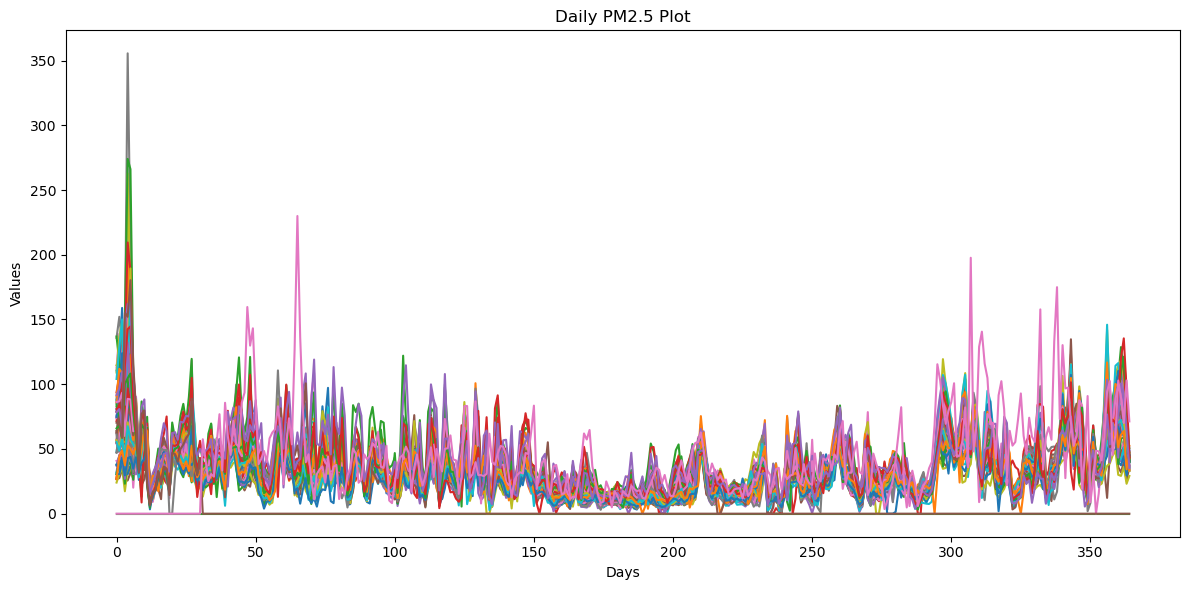

In [40]:
import matplotlib.pyplot as plt

# Plot the 'daily' DataFrame without showing the legend
daily.plot(figsize=(12, 6),legend=False)
plt.xlabel('Days')
plt.ylabel('Values')
plt.title('Daily PM2.5 Plot')
plt.tight_layout()

# Show the plot
plt.show()
#plt.legend(title='Columns', bbox_to_anchor=(1, 1))


### monthly averages

**prd** : list of dfs with all data for PRD only

**filtered**:   list of dfs with PM2.5 data for PRD only

len(filtered) = 365, each df in the list represents one day

In [45]:
# import pandas as pd

# # Assuming 'filtered' is a list of DataFrames containing data for the whole year

# # Select the first 56 columns for each DataFrame in the 'filtered' list
# filtered_subset = [df.iloc[:, :56] for df in filtered]

# # Concatenate the subset of DataFrames in 'filtered_subset' into a single DataFrame
# filtered_concatenated = pd.concat(filtered_subset)

# # Convert the index to a DatetimeIndex
# filtered_concatenated.index = pd.to_datetime(filtered_concatenated.index)

# # Calculate the monthly average for each column
# monthly = filtered_concatenated.resample('M').mean()

# # Reset index to have a separate column for the datetime index
# monthly.reset_index(inplace=True)

In [46]:
monthly

,index,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,...,1392A,1393A,1394A,1395A,1396A,1397A,1398A,1399A,1400A,1344A
0,1970-01-31,38.681518,36.309781,0.0,34.076343,34.976447,38.904513,33.9189,32.900336,33.535909,...,30.017519,29.856712,28.741733,25.881425,31.959972,38.582782,39.484279,42.677921,59.206284,46.582351


In [52]:
filtered[4].head()

,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,1354A,...,1394A,1395A,1396A,1397A,1398A,1399A,1400A,date,hour,type
1,191.0,173.0,0.0,132.0,124.0,159.0,181.0,132.0,161.0,112.0,...,57.0,39.0,49.0,100.0,145.0,154.0,139.0,20170105,0,PM2.5
16,198.0,181.0,0.0,144.0,136.0,172.0,184.0,138.0,165.0,114.0,...,64.0,39.0,50.0,98.0,143.0,142.0,159.0,20170105,1,PM2.5
31,203.0,184.0,0.0,159.0,130.0,180.0,187.0,142.0,145.0,112.0,...,67.0,42.0,48.0,93.0,134.0,128.0,145.0,20170105,2,PM2.5
46,202.0,182.0,0.0,162.0,130.0,199.0,170.0,140.0,89.0,118.0,...,69.0,36.0,45.0,89.0,132.0,123.0,148.0,20170105,3,PM2.5
61,202.0,184.0,0.0,177.0,127.0,201.0,135.0,137.0,79.0,119.0,...,75.0,50.0,43.0,87.0,119.0,97.0,138.0,20170105,4,PM2.5


In [103]:
import pandas as pd

# Assuming 'daily' is a DataFrame with 365 rows * 57 columns, where each row represents data for one day
month = daily

# Calculate the monthly average for each column
month['Date'] = pd.to_datetime(daily['date'],format='%Y%m%d')  # Convert the 'Date' column to datetime
month.set_index('Date', inplace=True)  # Set the 'Date' column as the index
monthly = month.resample('M').mean()  # Calculate the monthly average

# Ensure 'monthly' has exactly 12 rows and 57 columns
monthly = monthly.head(12)

# Reset index to have a separate column for the datetime index
monthly.reset_index(inplace=True)

# Print the shape of the 'monthly' DataFrame
print(monthly.shape)

(12, 58)


In [115]:
#monthly

In [111]:
# name each month 'Day'

Day = monthly['Date'].tolist()

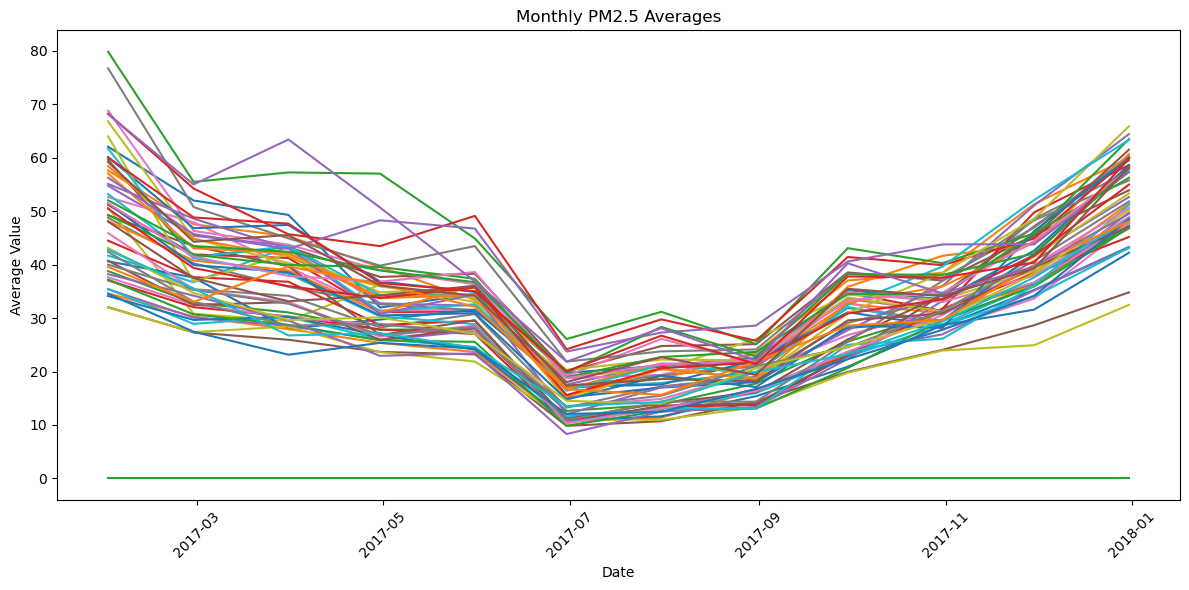

In [120]:
import matplotlib.pyplot as plt

# Assuming 'monthly' DataFrame contains the monthly averages

# Plotting the monthly averages
plt.figure(figsize=(12, 6))
for column in monthly.columns[1:-1]:  # Exclude the Date column
    plt.plot(monthly['Date'], monthly[column], label=column)

plt.xlabel('Date')
plt.ylabel('Average Value')
plt.title('Monthly PM2.5 Averages')
#plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [118]:
print(len(lon))
print(len(lat))
print(monthly.shape)

56
56
(12, 58)


In [121]:
a = monthly.columns[1:-1]
a

Index(['1345A', '1346A', '1347A', '1348A', '1349A', '1350A', '1351A', '1352A',
       '1353A', '1354A', '1355A', '1356A', '1357A', '1358A', '1359A', '1360A',
       '1361A', '1362A', '1363A', '1364A', '1365A', '1366A', '1367A', '1368A',
       '1369A', '1370A', '1371A', '1372A', '1373A', '1374A', '1375A', '1376A',
       '1377A', '1378A', '1379A', '1380A', '1381A', '1382A', '1383A', '1384A',
       '1385A', '1386A', '1387A', '1388A', '1389A', '1390A', '1391A', '1392A',
       '1393A', '1394A', '1395A', '1396A', '1397A', '1398A', '1399A', '1400A'],
      dtype='object')

### Plot the map

In [167]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming 'monthly' DataFrame contains the monthly averages, 'lon' and 'lat' are the coordinates

'''
this code works fine. but it gives 12 separate plot
'''


# # Create 12 plots, one for each month
# for i in range(12):
#     fig = plt.figure(figsize=(10, 8))
#     ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

#     ax.add_feature(cfeature.COASTLINE)
#     ax.add_feature(cfeature.BORDERS, linestyle=':')
#     ax.add_feature(cfeature.LAND, edgecolor='black')

#     # Scatter plot the data points on the map
#     sc = ax.scatter(lon, lat, c=monthly.iloc[i, 1:-1], cmap='coolwarm', s=50, transform=ccrs.PlateCarree())

#     plt.colorbar(sc, label='Average Value')
#     plt.title(f"Monthly Data for {monthly.iloc[i, 0]}")

#     plt.show()

'\nthis code works fine. but it gives 12 separate plot\n'

In [236]:
monthly = monthly.drop('date', axis=1)

In [238]:
date_list = ['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12']
# Add the 'date' column to the 'monthly' DataFrame with the date_list values
monthly['date'] = date_list

In [239]:
monthly.head()

,Date,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,...,1392A,1393A,1394A,1395A,1396A,1397A,1398A,1399A,1400A,date
0,2017-01-31,62.085579,57.642196,0.0,51.191826,54.767145,59.613780,52.647212,48.781652,50.688017,...,42.404287,43.129087,42.810798,34.574673,39.581597,52.046748,60.034113,68.151626,59.206081,2017-01
1,2017-02-28,52.010417,47.571429,0.0,41.921131,45.407738,41.502976,47.936012,40.257440,30.827381,...,33.055060,34.711310,35.543155,27.443452,33.041667,43.501488,48.840774,55.014881,44.291667,2017-02
2,2017-03-31,49.320243,45.309607,0.0,41.251461,43.558964,43.283310,39.573633,35.866585,29.443432,...,28.597008,29.646973,26.753448,23.148434,39.690159,42.407959,47.682562,63.424205,45.553997,2017-03
3,2017-04-30,31.980374,39.570713,0.0,31.082126,32.750483,37.695773,31.426993,32.588889,36.233273,...,28.924517,30.133394,27.205012,25.367331,36.284239,38.910085,36.563587,50.694082,36.092754,2017-04
4,2017-05-31,34.527719,33.416200,0.0,31.292396,32.330970,38.307761,31.542449,31.498974,33.011716,...,27.032054,27.059784,24.428794,24.293664,32.155445,36.721760,35.043720,36.884526,34.188620,2017-05


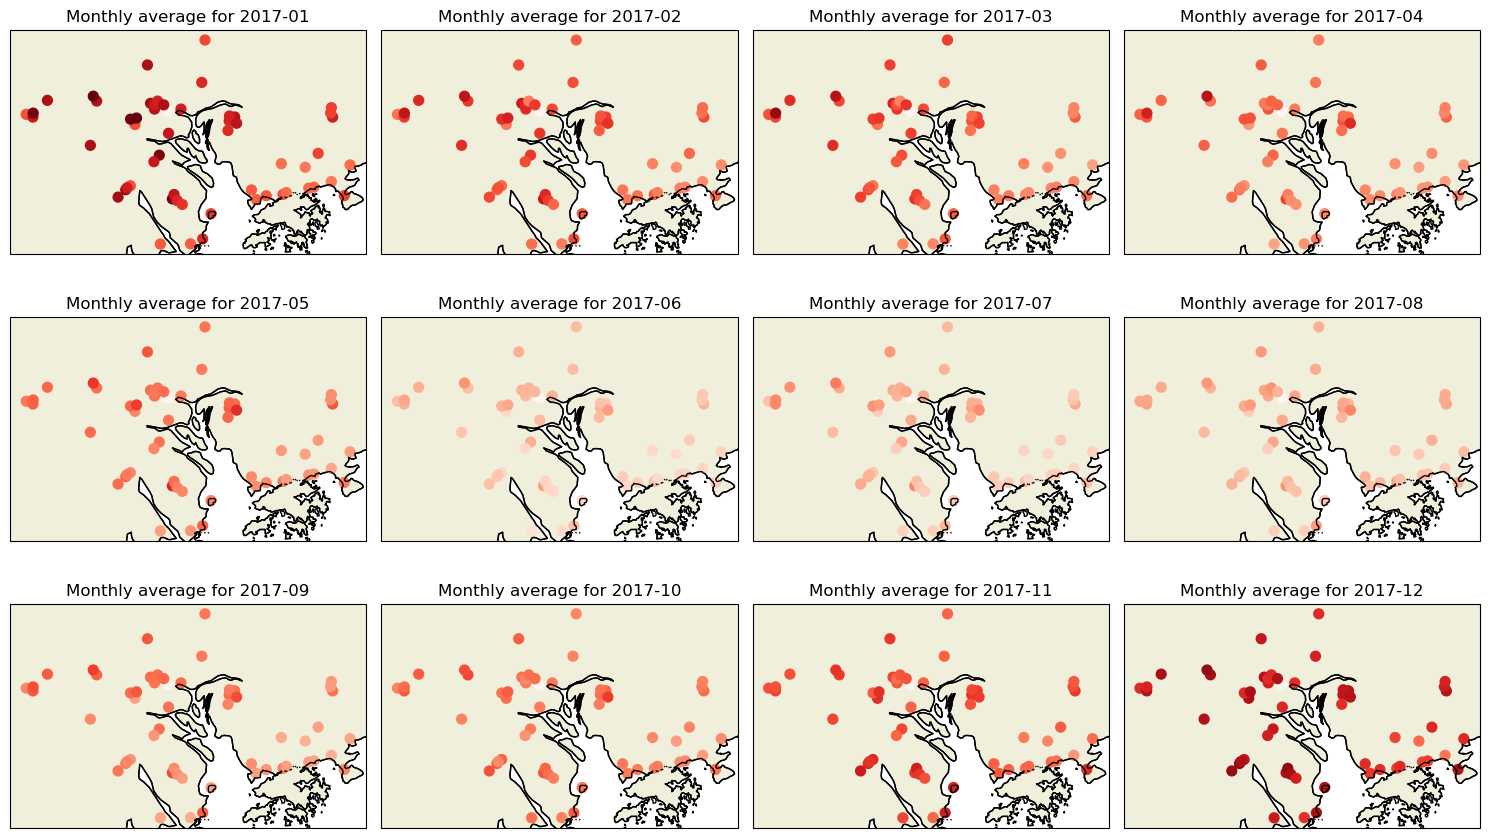

In [247]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming 'monthly' DataFrame contains the monthly averages, 'lon' and 'lat' are the coordinates

# Create a figure with subplots arranged in a 4x3 grid
fig, axs = plt.subplots(3, 4, figsize=(15, 9), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot each month's data on a subplot
for i, ax in enumerate(axs.flat):
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')

    sc = ax.scatter(lon, lat, c=monthly.iloc[i, 1:-1], cmap='Reds', s=50, transform=ccrs.PlateCarree(), vmin=0, vmax =70)
    ax.set_title(f"Monthly average for {monthly.iloc[i, -1]}")

# fig.subplots_adjust(bottom=0.8)
# cbar_ax = fig.add_axes([0.15,-0.05, 0.7, 0.03])
# fig.colorbar(sc, orientation='horizontal', cax=cbar_ax, label= 'PM2.5 ug/m3')
# cbar.set_label('PM2.5 ug/m3')

plt.tight_layout()
plt.show()

/var/folders/2n/_rb3symj5cj8_z4p1hf_hkjm0000gn/T/ipykernel_53929/2979415993.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


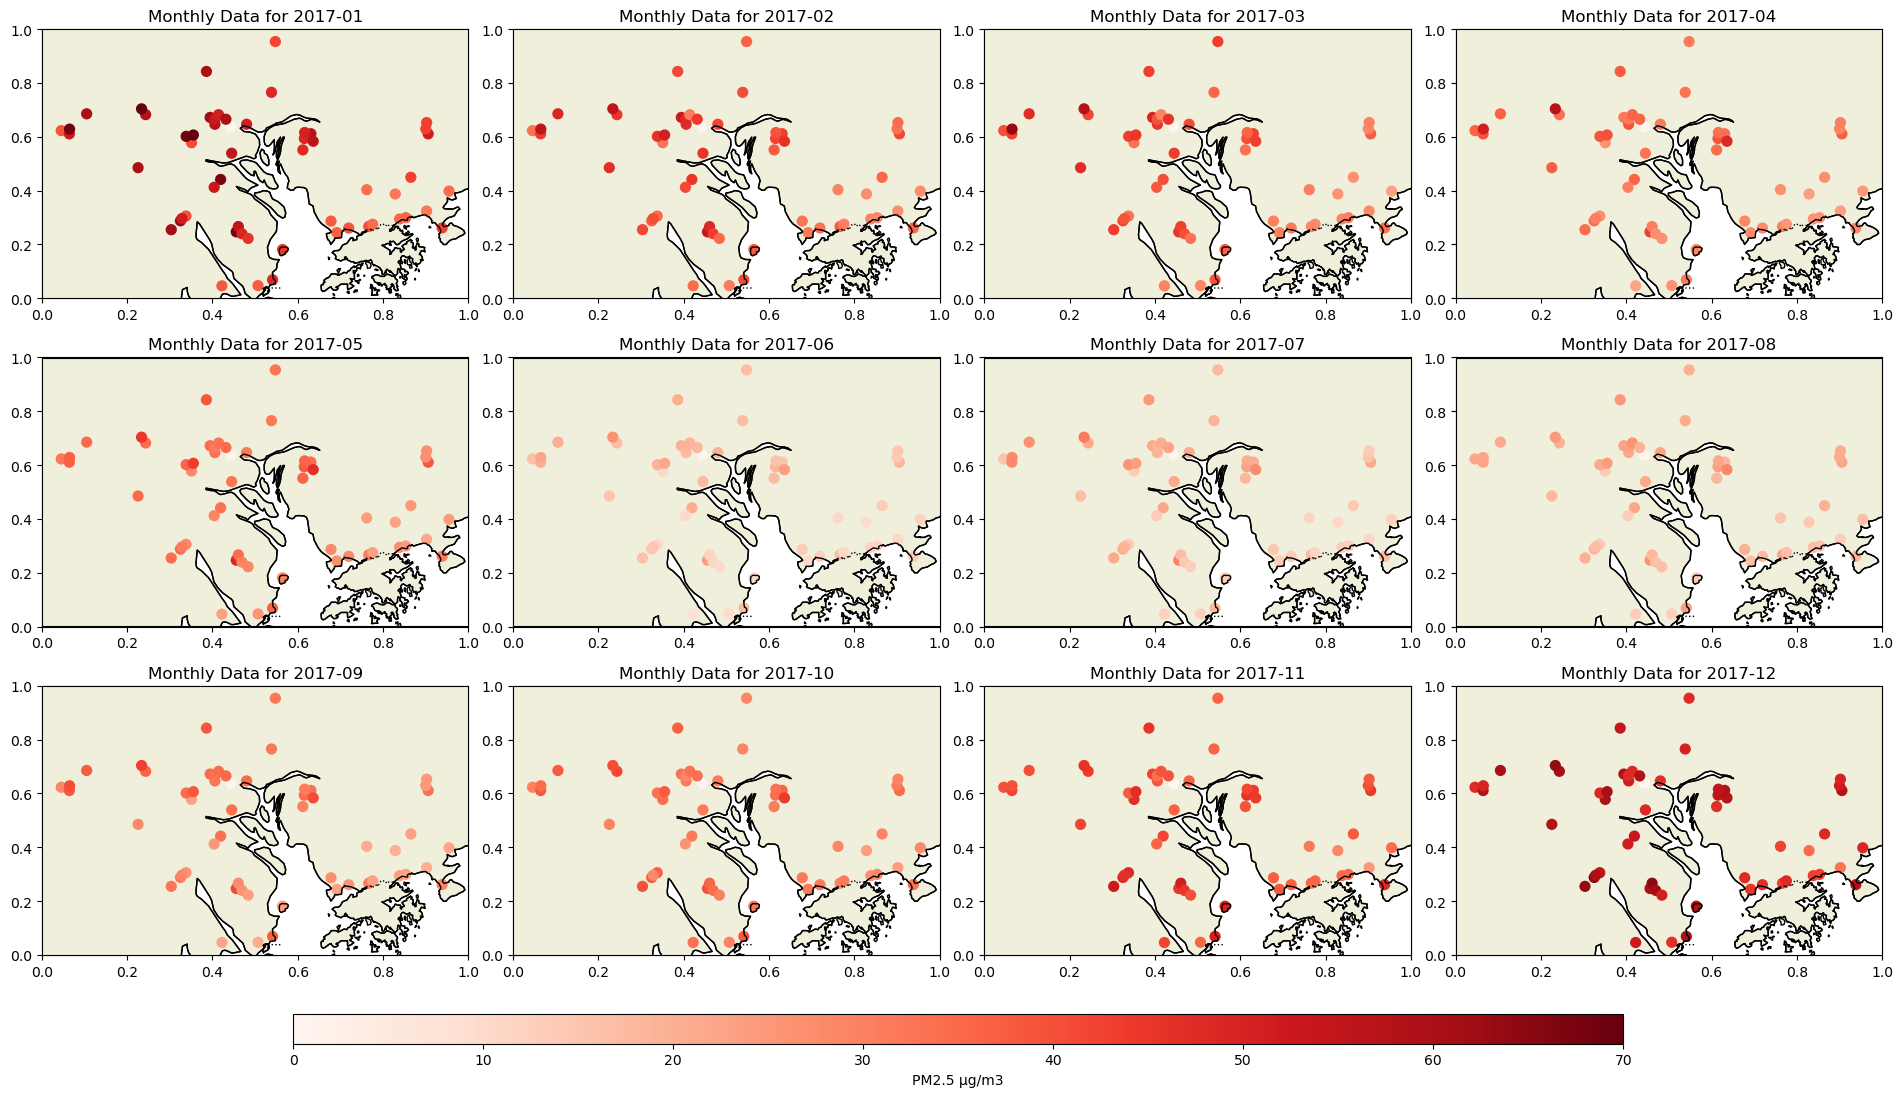

In [248]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming 'monthly' DataFrame contains the monthly averages, 'lon' and 'lat' are the coordinates

# # Create a figure with subplots arranged in a 4x3 grid
fig, axs = plt.subplots(3, 4, figsize=(19, 10))

# # Plot each month's data on a subplot
for i, ax in enumerate(axs.flat):
     ax = fig.add_subplot(3, 4, i+1, projection=ccrs.PlateCarree())
     ax.add_feature(cfeature.COASTLINE)
     ax.add_feature(cfeature.BORDERS, linestyle=':')
     ax.add_feature(cfeature.LAND, edgecolor='black')

     sc = ax.scatter(lon, lat, c=monthly.iloc[i, 1:-1], cmap='Reds', s=50, transform=ccrs.PlateCarree(), vmin=0, vmax = 70)
     ax.set_title(f"Monthly Data for {monthly.iloc[i, -1]}")
     ax.set_xlabel('lon')  # Set x-axis label to 'lon'
     ax.set_ylabel('lat')  # Set y-axis label to 'lat'

# # Add a big colorbar at the bottom of all plots
# divider = make_axes_locatable(axs[0])#, 0])  # Use the first subplot to set the colorbar location
# #divider = make_axes_locatable(axs[2, 0])
# cax = divider.append_axes("bottom", size="227%", pad=0.1)
# cbar = plt.colorbar(sc, cax=cax, orientation='horizontal')
# cbar.set_label('PM2.5')
#if cbar_show == 'true':
# cbar = plt.colorbar(sc, orientation='horizontal', pad=0.02, aspect=20, extend='both', fraction= 0.08)
# cbar.ax.tick_params(labelsize=8)
# #cbar.set_ticks(ticks)
# cbar.set_label('ug/m3',fontsize=8)


fig.subplots_adjust(bottom=0.8)
cbar_ax = fig.add_axes([0.15,-0.05, 0.7, 0.03])
fig.colorbar(sc, orientation='horizontal', cax=cbar_ax,label = 'PM2.5 μg/m3')
cbar.set_label('PM2.5 μg/m³', fontsize=14) 


plt.tight_layout()
plt.show()

In [244]:


# # Assuming 'monthly' DataFrame contains the monthly averages, 'lon' and 'lat' are the coordinates

# # Create a figure with subplots arranged in a 3x4 grid
# fig, axs = plt.subplots(3, 4, figsize=(19, 10))

# # Plot each month's data on a subplot
# for i, ax in enumerate(axs.flat):
#     ax = fig.add_subplot(3, 4, i+1, projection=ccrs.PlateCarree())
#     ax.add_feature(cfeature.COASTLINE)
#     ax.add_feature(cfeature.BORDERS, linestyle=':')
#     ax.add_feature(cfeature.LAND, edgecolor='black')

#     sc = ax.scatter(lon, lat, c=monthly.iloc[i, 1:-1], cmap='coolwarm', s=50, transform=ccrs.PlateCarree(), vmin=0, vmax=70)
#     ax.set_title(f"Monthly Data for {monthly.iloc[i, 0]}")
    
#     ax.set_xticks([])  # Hide the x-axis labels
#     ax.set_yticks([])  # Hide the y-axis labels

# plt.tight_layout()
# plt.show()

In [253]:
monthly['1354A']  # 2017

0     41.704891
1     36.708333
2     43.334736
3     31.210024
4     32.597721
5     17.044208
6     17.863979
7     19.857387
8     32.086252
9     28.842133
10    36.238889
11    48.072581
Name: 1354A, dtype: float64

In [ ]:
'''
compare PM2.5 date from Prof. Yu and from MEE
'''

In [262]:
speciesNS = pd.read_excel('/Users/hrd/Documents/N Dep/PM25Guangdong/PRD NS+GZ 2007-2020/speciesNS.xlsx')
speciesGZ = pd.read_excel('/Users/hrd/Documents/N Dep/PM25Guangdong/PRD NS+GZ 2007-2020/speciesGZ.xlsx')
speciesNH = pd.read_excel('/Users/hrd/Documents/N Dep/PM25Guangdong/PRD NS+GZ 2007-2020/speciesNH.xlsx')
speciesDG = pd.read_excel('/Users/hrd/Documents/N Dep/PM25Guangdong/PRD NS+GZ 2007-2020/speciesDG.xlsx')

mee14 = pd.read_csv('/Users/hrd/Documents/N Dep/PM25Guangdong/PRD NS+GZ 2007-2020/MEE_2014.csv')

Text(0, 0.5, 'MEE')

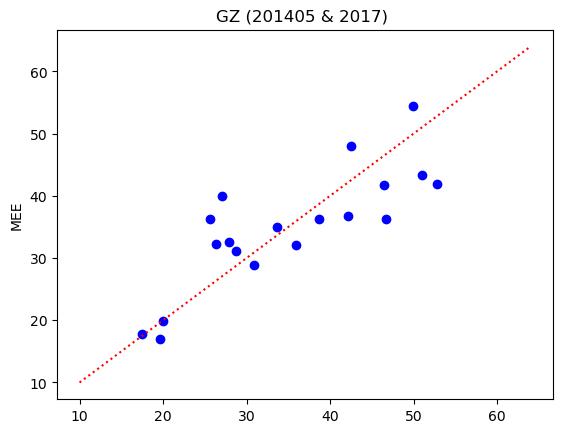

In [280]:
plt.scatter(speciesGZ['PM2.5'][-12:],monthly['1354A'],color='blue')
plt.scatter(speciesGZ['PM2.5'][-20:-12],mee14['1354A'],color='blue')

x = range(10,65)
plt.plot(x,x, color='red', linestyle = ':')

plt.title('GZ (201405 & 2017) ')
plt.ylabel('MEE')

Text(0, 0.5, 'MEE')

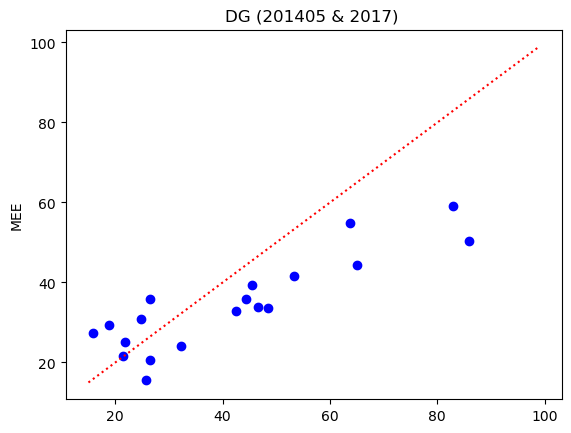

In [279]:
plt.scatter(speciesDG['Teflon Mass'][-12:],monthly['1388A'], color = 'blue')
plt.scatter(speciesDG['Teflon Mass'][-20:-12],mee14['1388A'],color = 'blue')

x = range(15,100)
plt.plot(x,x, color='red', linestyle = ':')

plt.title('DG (201405 & 2017) ')
plt.ylabel('MEE')

Text(0, 0.5, 'MEE')

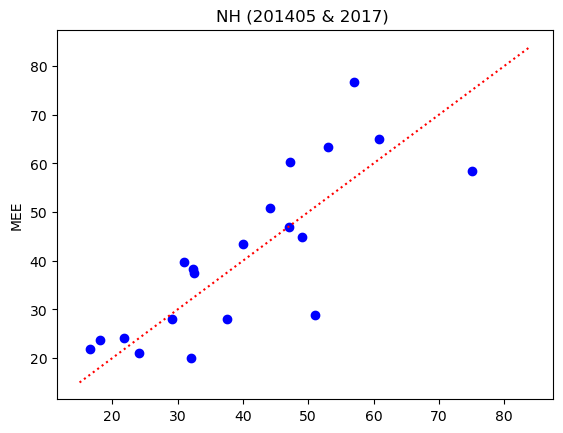

In [278]:
plt.scatter(speciesNH['PM2.5'][-12:],monthly['1372A'], color = 'blue')
plt.scatter(speciesNH['Teflon Mass'][-20:-12],mee14['1372A'],color = 'blue')

x = range(15,85)
plt.plot(x,x, color='red', linestyle = ':')

plt.title('NH (201405 & 2017) ')
plt.ylabel('MEE')

In [297]:
NH = speciesNH.dropna(subset=['Teflon Mass'])
GZ = speciesGZ.dropna(subset=['Teflon Mass'])

r-squared:  0.633159631192978


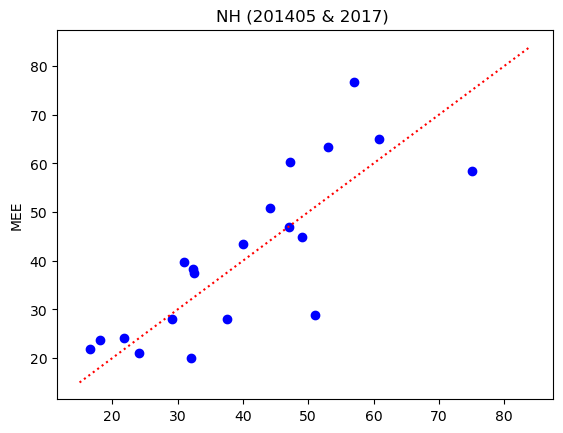

In [315]:
# Fit a linear regression model

X = GZ['Teflon Mass'][-20:].values.reshape(-1,1)
y = np.append(mee14['1372A'],monthly['1372A'])

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
#plt.plot(speciesNH['PM2.5'][-20:], slope * speciesNH['PM2.5'][-20:] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.4f}x + {intercept:.2f}'
#plt.text(0.5, 65, equation, color='red')

plt.scatter(speciesNH['PM2.5'][-12:],monthly['1372A'], color = 'blue')
plt.scatter(speciesNH['Teflon Mass'][-20:-12],mee14['1372A'],color = 'blue')

x = range(15,85)
plt.plot(x,x, color='red', linestyle = ':')

plt.title('NH (201405 & 2017) ')
plt.ylabel('MEE')


print('r-squared: ',model.score(X,y))

In [304]:
speciesGZ

,Unnamed: 0,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,Aluminum,...,T Mass,Al,Si,Mn,Fe,PM2.5,S/SO4,Na,Trace_Element,MD
0,200701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,200702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,200703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,200704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,200705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,201708,NaN,1.986781,0.336618,0.134627,1.013242,5.317807,8.006018,0.719653,NaN,...,NaN,0.158154,0.267239,0.020279,0.314139,19.937208,NaN,0.227341,0.535393,1.264592
104,201709,NaN,4.707227,0.559164,0.326492,3.917853,9.650088,11.960715,1.348562,NaN,...,NaN,0.263749,0.475196,0.027983,0.452607,35.923039,NaN,0.244711,0.800285,1.969952
105,201710,NaN,3.990456,0.477488,0.081881,1.160856,10.143957,10.207024,0.761580,NaN,...,NaN,0.216005,0.391007,0.021750,0.333853,30.931762,NaN,0.154308,0.608006,1.696808
106,201711,NaN,6.183862,0.912709,0.643023,5.900408,12.119432,13.897145,1.843923,NaN,...,NaN,0.269319,0.537374,0.034118,0.470202,46.650971,NaN,0.223962,0.889165,2.586531


Text(0.5, 0, 'time')

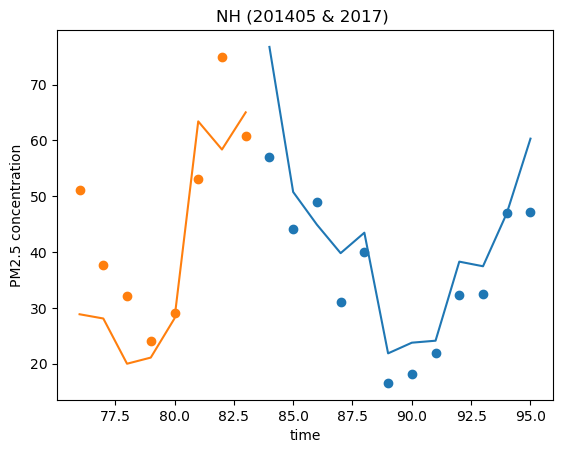

In [313]:
plt.scatter(speciesNH.index[-12:], speciesNH['PM2.5'][-12:])#,monthly['1372A'], color = 'blue')
plt.scatter(speciesNH.index[-20:-12], speciesNH['Teflon Mass'][-20:-12])#,mee14['1372A'],color = 'blue')

plt.plot(speciesNH.index[-12:], monthly['1372A'])
plt.plot(speciesNH.index[-20:-12], mee14['1372A'])
# x = range(15,85)
# plt.plot(x,x, color='red', linestyle = ':')

plt.title('NH (201405 & 2017) ')
plt.ylabel('PM2.5 concentration')
plt.xlabel('time')

In [293]:
y

array([28.86773505, 28.1088227 , 20.00500167, 21.10602873, 28.12210145,
       63.42479493, 58.3852646 , 65.04376772, 76.76393113, 50.77827381,
       44.92473118, 39.81684783, 43.48064432, 21.86239039, 23.77347863,
       24.1297654 , 38.29476075, 37.4656298 , 46.94444444, 60.33064516])

In [ ]:
# oh, x-axis
# how caprice you are
# everytime there's a plot
# something obscure will always happen
# oh, x-label
# what simple, yet complicated thing
# how can I ever know
# the way to adjust you to make sense
# oh, x-axis
# whether how quished
# or completely nonsense
# you never
# never
# appeared in the form I expected you to be